In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
a = 1
b = 1
alpha = 87 * np.pi/180

params = [a, b, alpha]

latt = np.array([[a, 0],[b*np.cos(alpha), b*np.sin(alpha)]])
latt

array([[1.        , 0.        ],
       [0.05233596, 0.99862953]])

In [36]:
def convert(traj, latt):
    return np.einsum('ijk,kl->ijl', traj, latt)
     

In [37]:
frac_box = np.array([[[0,0],[1,0],[1,1],[0,1],[0,0]]])
cart_box = convert(frac_box, latt)

frac_box = frac_box.squeeze()
cart_box = cart_box.squeeze()
cart_box

array([[0.        , 0.        ],
       [1.        , 0.        ],
       [1.05233596, 0.99862953],
       [0.05233596, 0.99862953],
       [0.        , 0.        ]])

In [38]:
frac_traj = np.array([[[0.5,0.5]],[[0.89,0.95]]])
cart_traj = convert(frac_traj, latt)

cart_traj

array([[[0.52616798, 0.49931477]],

       [[0.93971916, 0.94869806]]])

In [39]:
frac_box[:,0]

array([0, 1, 1, 0, 0])

(-0.1, 1.1049527540550912)

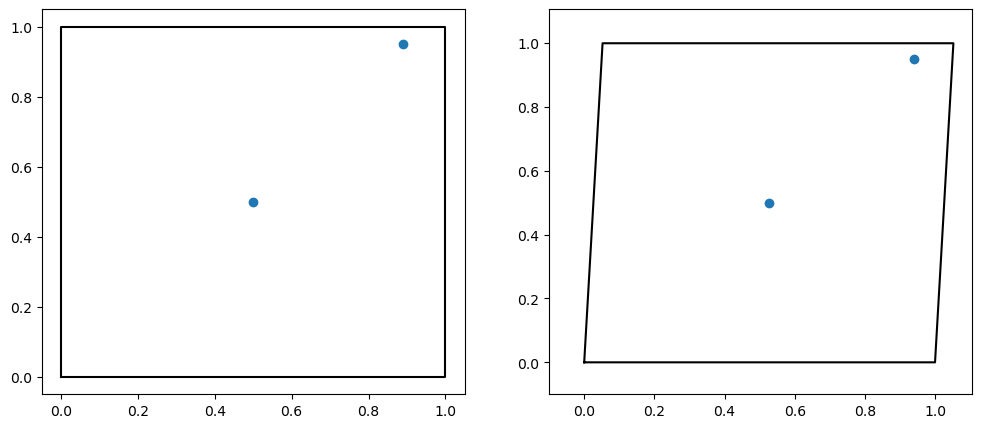

In [40]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_traj[:,:,0],frac_traj[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_traj[:,:,0],cart_traj[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

In [41]:
frac_vector = np.diff(frac_traj, axis=0)
cart_vector = np.diff(cart_traj, axis=0)
frac_vector

array([[[0.39, 0.45]]])

(-0.1, 1.1049527540550912)

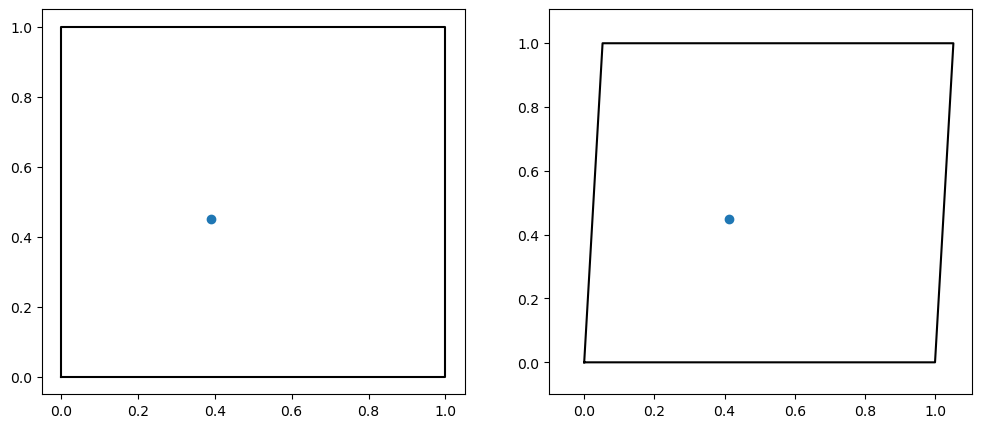

In [42]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_vector[:,:,0],frac_vector[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_vector[:,:,0],cart_vector[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

In [43]:
np.linalg.norm(cart_box[0]-cart_vector), np.linalg.norm(cart_box[3]-cart_vector)

(0.6107126334384064, 0.6573795515315161)

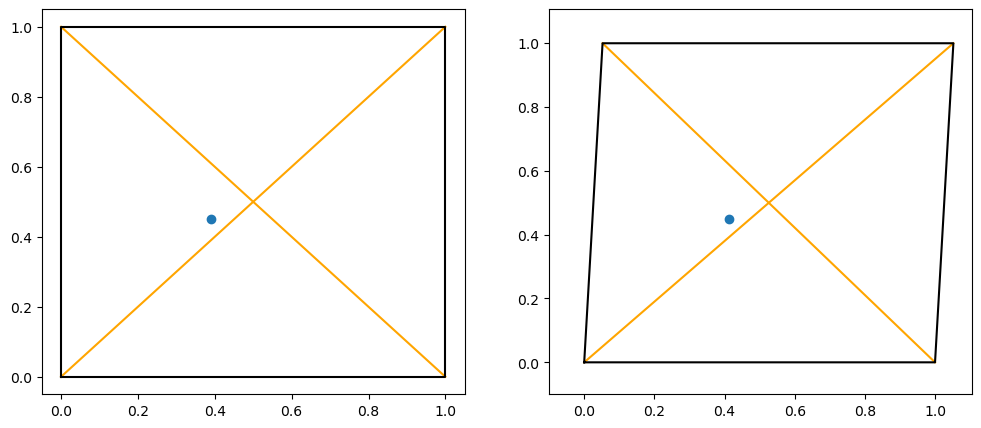

In [44]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_vector[:,:,0],frac_vector[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_vector[:,:,0],cart_vector[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

frac.plot([0,1],[0,1], color='orange',zorder=-1)
frac.plot([1,0],[0,1], color='orange',zorder=-1)

cart.plot(cart_box[[0,-3],0],cart_box[[0,-3],1], color='orange',zorder=-1)
cart.plot(cart_box[[-2,1],0],cart_box[[-2,1],1], color='orange',zorder=-1)

[0.026167978121471983, 0.5] [0.4993147673772869, 9.54056834386408]


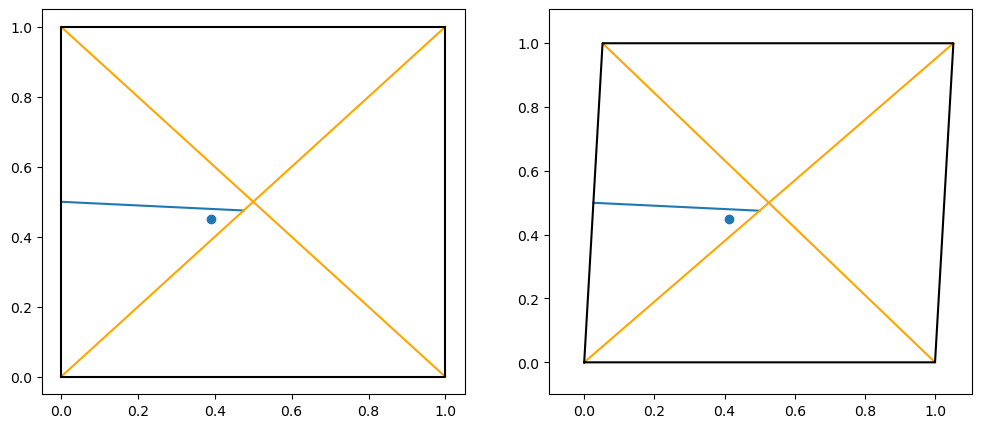

In [45]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_vector[:,:,0],frac_vector[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_vector[:,:,0],cart_vector[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

frac.plot([0,1],[0,1], color='orange',zorder=-1)
frac.plot([1,0],[0,1], color='orange',zorder=-1)

cart.plot(cart_box[[0,-3],0],cart_box[[0,-3],1], color='orange',zorder=-1)
cart.plot(cart_box[[-2,1],0],cart_box[[-2,1],1], color='orange',zorder=-1)

half = np.dot([0,0.5], latt)
print([half[0], b/2],[half[1], np.tan(alpha)*b/2])
cart.plot([half[0], b/2],[half[1], np.tan(alpha/2)*b/2], zorder=-2)

inv_half = np.dot([b/2,np.tan(alpha/2)*b/2], np.linalg.inv(latt))
frac.plot([0,inv_half[0]],[0.5,inv_half[1]], zorder=-2)

0.5 0.4744822833574398 0.9489645667148796


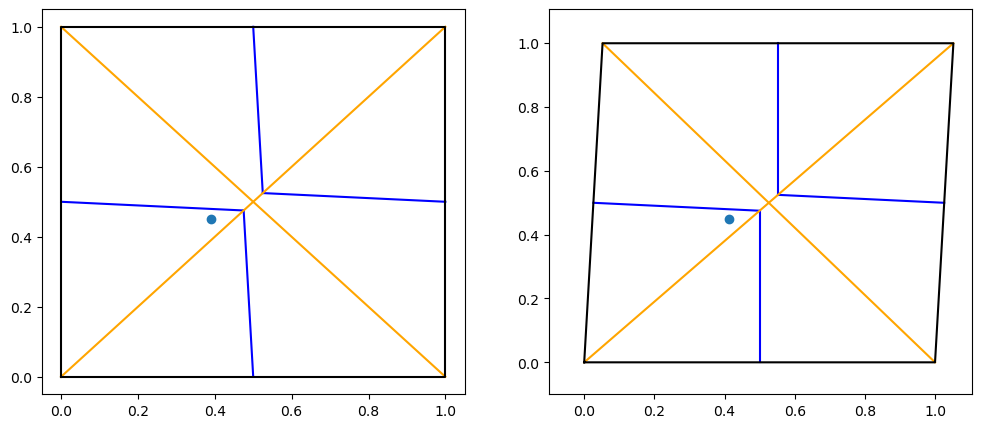

In [46]:
fig, axs = plt.subplots(1,2, figsize=(12,5))


frac = axs[0]
frac.plot(frac_box[:,0],frac_box[:,1], color='black')
frac.scatter(frac_vector[:,:,0],frac_vector[:,:,1])

cart = axs[1]
cart.plot(cart_box[:,0],cart_box[:,1], color='black')
cart.scatter(cart_vector[:,:,0],cart_vector[:,:,1])
cart_lims = np.array([cart.get_xlim(),cart.get_ylim()]).flatten()
cart.set_ylim(-0.1, cart_lims.max())
cart.set_xlim(-0.1, cart_lims.max())

frac.plot([0,1],[0,1], color='orange',zorder=-1)
frac.plot([1,0],[0,1], color='orange',zorder=-1)

cart.plot(cart_box[[0,-3],0],cart_box[[0,-3],1], color='orange',zorder=-1)
cart.plot(cart_box[[-2,1],0],cart_box[[-2,1],1], color='orange',zorder=-1)

frac_halfs = np.array([[0.5,0],[1,0.5],[0.5,1],[0,0.5]])
cart_halfs = np.array([np.dot(x, latt) for x in frac_halfs])

m = cart_box[2,1] / cart_box[2,0]
beta = np.arctan(m)
gamma = alpha - beta
x_1 = (b * np.cos(beta)) / (2 * np.cos(gamma))
y_1 = m*x_1
print(x_1,y_1, m)
cart.plot([cart_halfs[-1,0], x_1],[cart_halfs[-1,1], y_1], zorder=-2, color='blue')
cart.plot([cart_halfs[0,0], x_1],[cart_halfs[0,1], y_1], zorder=-2, color='blue')

inv_half = np.dot([x_1,y_1], np.linalg.inv(latt))
frac.plot([0,inv_half[0]],[0.5,inv_half[1]], zorder=-2, color='blue')
frac.plot([0.5,inv_half[0]],[0,inv_half[1]], zorder=-2, color='blue')

reflected = cart_box[2] - np.array([x_1,y_1])
cart.plot([cart_halfs[1,0],reflected[0]],[cart_halfs[1,1],reflected[1]], zorder=-2, color='blue')
cart.plot([cart_halfs[2,0],reflected[0]],[cart_halfs[2,1],reflected[1]], zorder=-2, color='blue')
frac_reflected = np.dot(reflected, np.linalg.inv(latt))
frac.plot([frac_halfs[1,0],frac_reflected[0]],[frac_halfs[1,1],frac_reflected[1]], zorder=-2, color='blue')
frac.plot([frac_halfs[2,0],frac_reflected[0]],[frac_halfs[2,1],frac_reflected[1]], zorder=-2, color='blue')

In [47]:
import numexpr as ne

In [48]:
def check_line(y2, y1, y0, x1, x2):
    res = ne.evaluate('y2>((y1-y0)/x1)*x2+y0')
    return res

y2 = frac_vector[0,0,1]
y0 = frac_halfs[3,1]
x1, y1 = np.dot([x_1,y_1], np.linalg.inv(latt))
x2 = frac_vector[0,0,0]

check_line(y2,y1,y0,x1,x2)

array(False)